In [19]:
import numpy as np
import pandas as pd

df = pd.read_csv("/home/gagan/DataScienceProjects/KickstarterSuccess/data/ks-projects-201801.csv")

print(df.shape)
df.info()


(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ 

In [20]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [21]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [22]:
print(df['state'].value_counts())
print(df['state'].unique())

state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: count, dtype: int64
['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']


In [23]:
state_to_drop = ['canceled', 'undefined', 'live', 'suspended']
state_filtered = df[df['state'].isin(state_to_drop)].index

df_prelaunch = df.drop(state_filtered)

print(df_prelaunch['state'].value_counts())

state
failed        197719
successful    133956
Name: count, dtype: int64


In [24]:
df_prelaunch['target'] = np.where(df_prelaunch['state'] == 'successful', 1, 0)

df_prelaunch['target'].value_counts()

target
0    197719
1    133956
Name: count, dtype: int64

In [28]:
df_prelaunch['launched'] = pd.to_datetime(df_prelaunch['launched'])
df_prelaunch['deadline'] = pd.to_datetime(df_prelaunch['deadline'])

df_prelaunch['duration_days'] = (df_prelaunch['deadline'] - df_prelaunch['launched']).dt.days

df_prelaunch['launch_month'] = df_prelaunch['launched'].dt.month
df_prelaunch['launch_day'] = df_prelaunch['launched'].dt.day

df_prelaunch['launched'] = pd.to_datetime(df_prelaunch['launched']).dt.date
df_prelaunch['deadline'] = pd.to_datetime(df_prelaunch['deadline']).dt.date

df_prelaunch.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,target,duration_days,launch_month,launch_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,0,59,8,11
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,0,60,9,2
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,0,45,1,12
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,0,30,3,17
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224,US,52375.0,52375.0,50000.00,1,35,2,26


In [31]:
df['usd_goal_real'].value_counts()

usd_goal_real
5000.00     24173
10000.00    20786
1000.00     13029
3000.00     12699
2000.00     11915
            ...  
1030.28         1
392.40          1
30313.01        1
16470.98        1
15490.27        1
Name: count, Length: 50339, dtype: int64

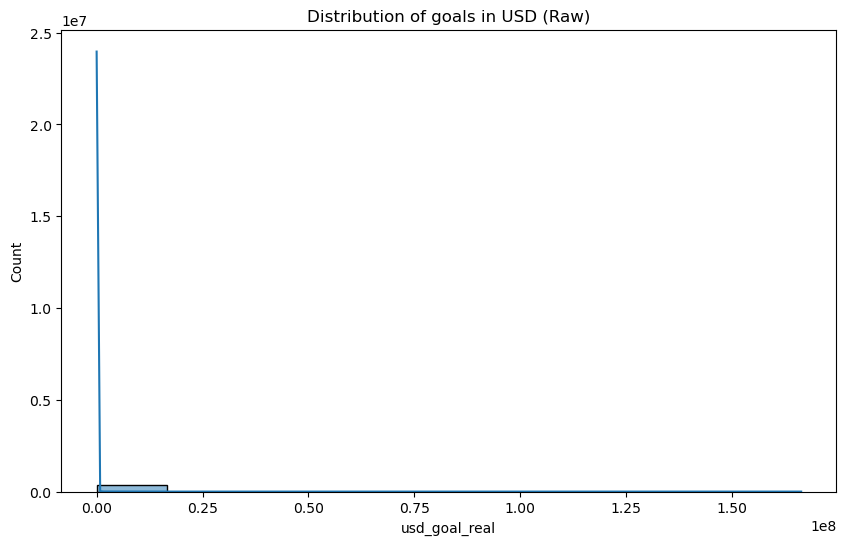

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_prelaunch, x='usd_goal_real', bins=10, kde=True)
plt.title("Distribution of goals in USD (Raw)")
plt.show()

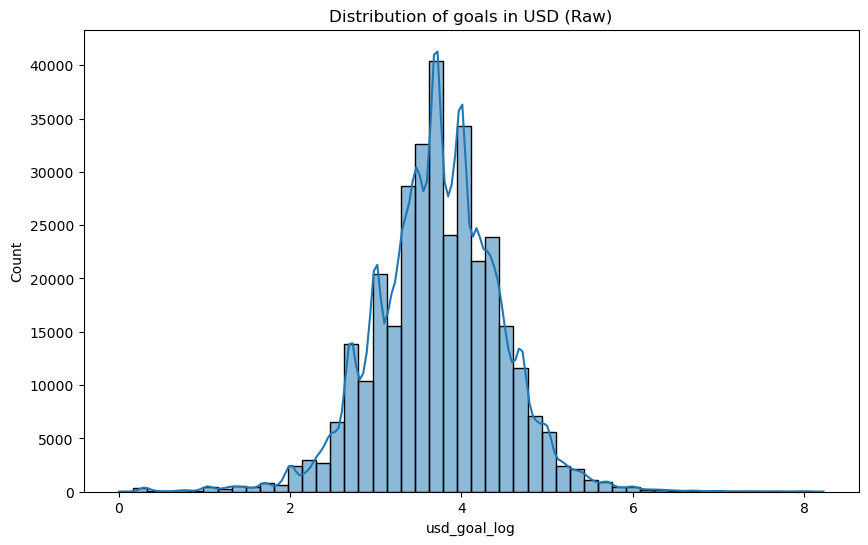

In [39]:
df_prelaunch['usd_goal_log'] = np.log10(df_prelaunch['usd_goal_real']+1)

plt.figure(figsize=(10,6))
sns.histplot(df_prelaunch, x='usd_goal_log', bins=50, kde=True)
plt.title("Distribution of goals in USD (Raw)")
plt.show()

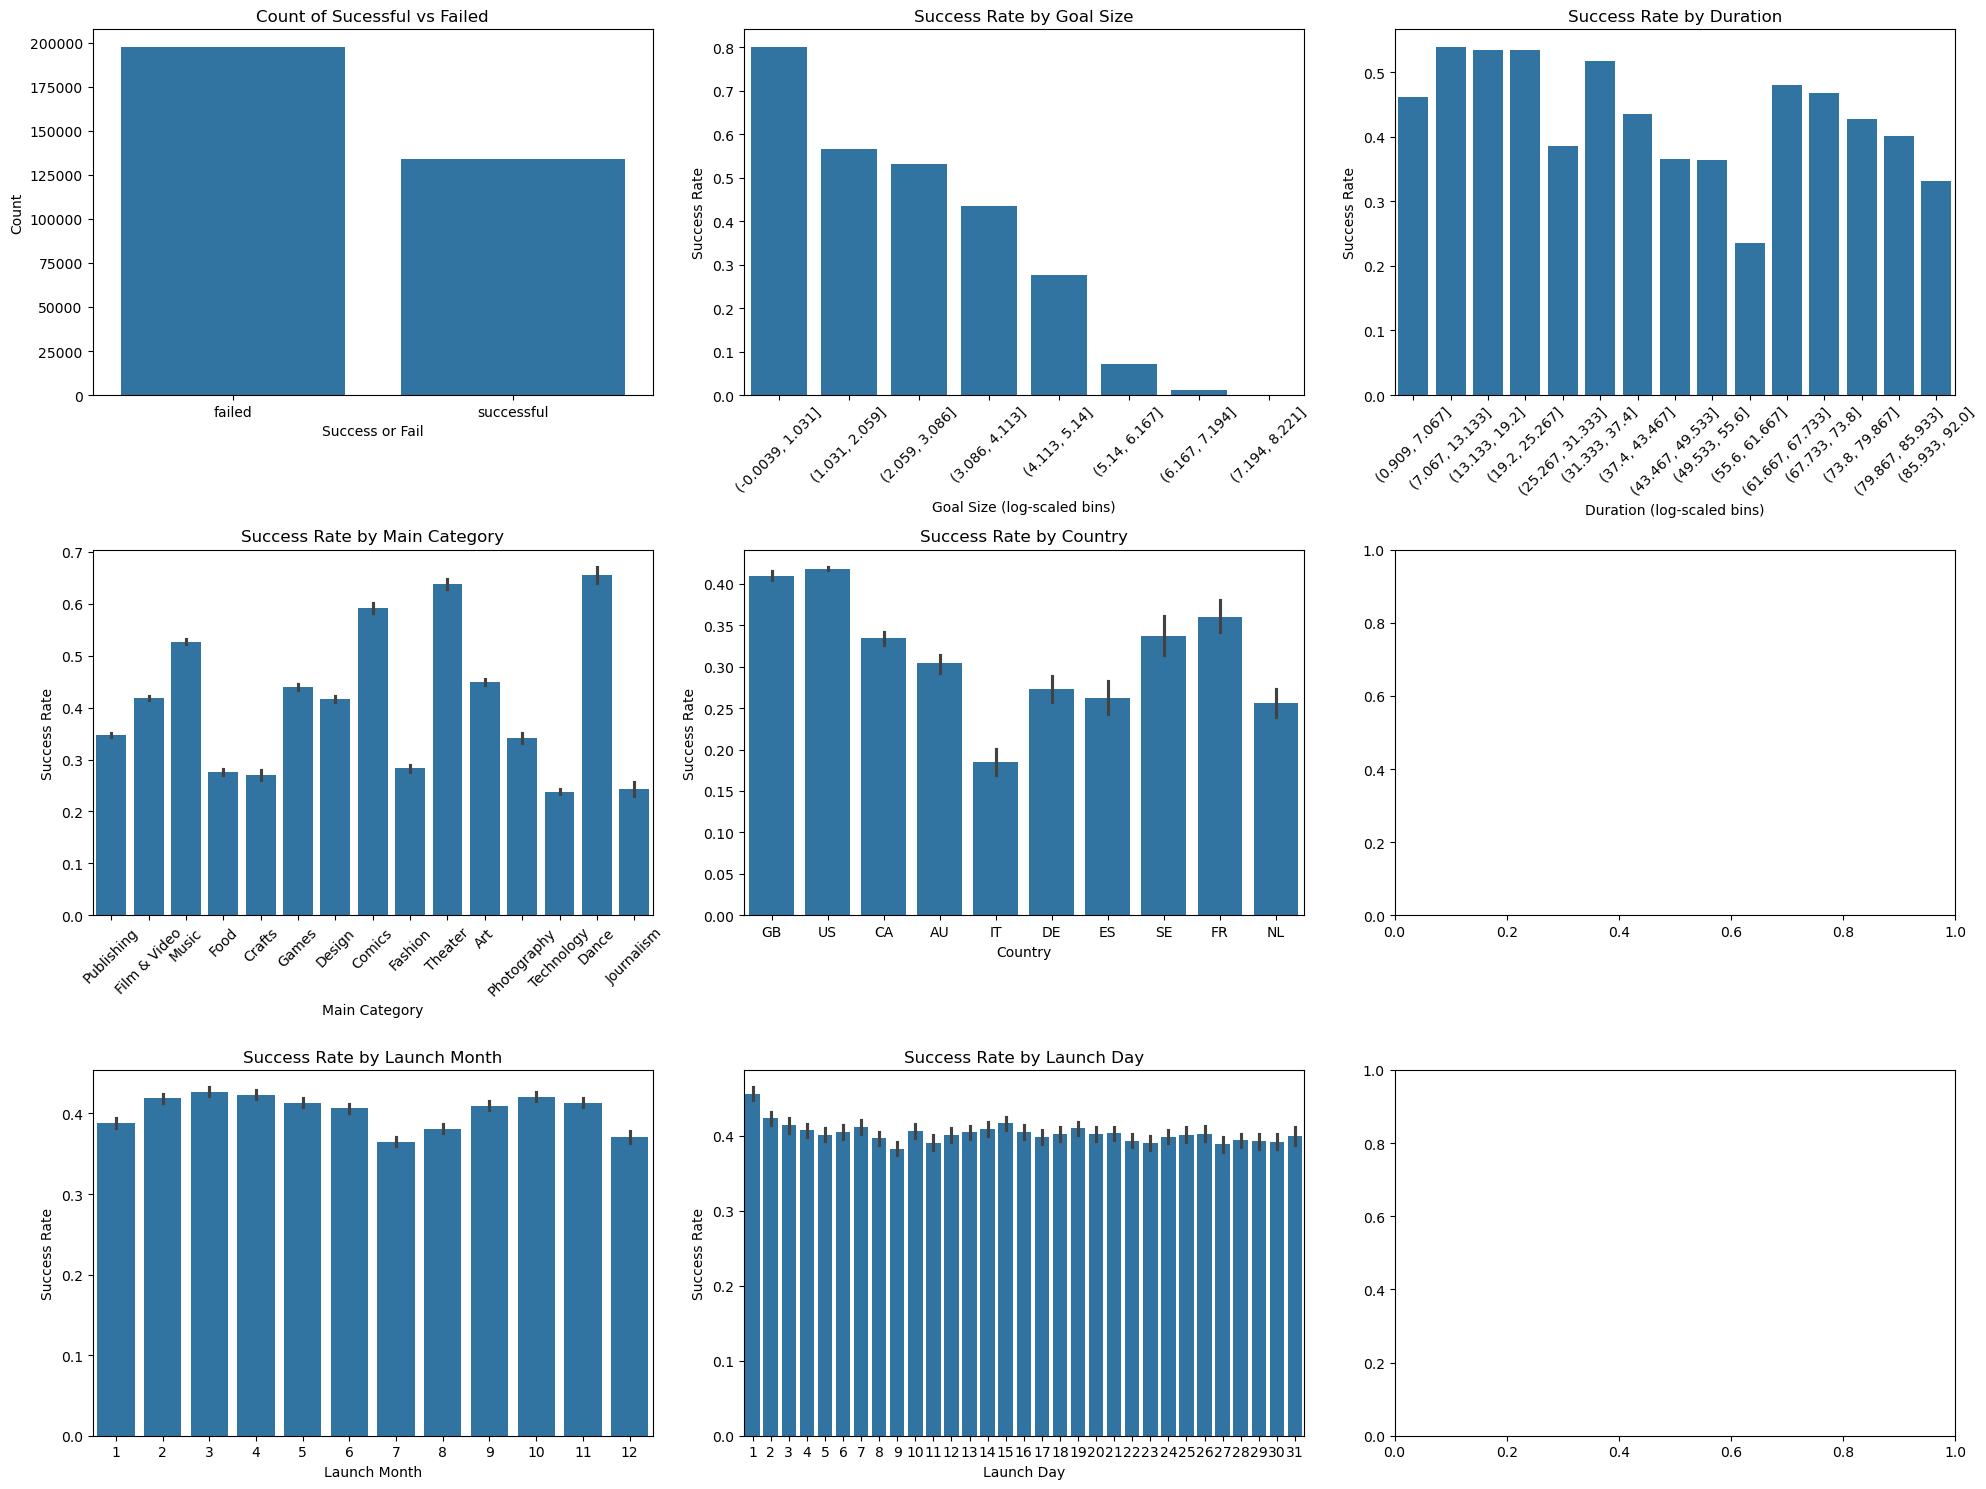

In [ ]:
#Create a 3x3 subplot 
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

#Graph 1
sns.countplot(data=df_prelaunch, x='state', ax=axes[0,0])
axes[0,0].set_title('Count of Sucessful vs Failed')
axes[0,0].set_xlabel('Success or Fail')
axes[0,0].set_ylabel('Count')

#Graph 2
df_prelaunch['goal_bin'] = pd.cut(df_prelaunch['usd_goal_log'], bins=8)
success_by_goal = (df_prelaunch.groupby('goal_bin', observed=True)['target'].mean().reset_index())
sns.barplot(data=success_by_goal, x='goal_bin', y='target', ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Success Rate by Goal Size')
axes[0,1].set_xlabel('Goal Size (log-scaled bins)')
axes[0,1].set_ylabel('Success Rate')

#Graph 3
df_prelaunch['duration_bin'] = pd.cut(df_prelaunch['duration_days'], bins=15)
success_by_duration = (df_prelaunch.groupby('duration_bin', observed=True)['target'].mean().reset_index())
sns.barplot(data=success_by_duration, x='duration_bin', y='target', ax=axes[0,2])
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].set_title('Success Rate by Duration')
axes[0,2].set_xlabel('Duration')
axes[0,2].set_ylabel('Success Rate')

#Graph 4
sns.barplot(data=df_prelaunch, x='main_category', y='target', ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_title('Success Rate by Main Category')
axes[1,0].set_xlabel('Main Category')
axes[1,0].set_ylabel('Success Rate')

#Graph 5
top_countries = df_prelaunch['country'].value_counts().head(10).index
df_top = df_prelaunch[df_prelaunch['country'].isin(top_countries)]
sns.barplot(data=df_top, x='country', y='target', ax=axes[1,1])
axes[1,1].set_title('Success Rate by Country')
axes[1,1].set_xlabel('Country')
axes[1,1].set_ylabel('Success Rate')

#Graph 6
sns.barplot(data=df_prelaunch, x='launch_month', y='target', ax=axes[2,0])
axes[2,0].set_title('Success Rate by Launch Month')
axes[2,0].set_xlabel('Launch Month')
axes[2,0].set_ylabel('Success Rate')

#Graph 7
sns.barplot(data=df_prelaunch, x='launch_day', y='target', ax=axes[2,1])
axes[2,1].set_title('Success Rate by Launch Day')
axes[2,1].set_xlabel('Launch Day')
axes[2,1].set_ylabel('Success Rate')

#Show graphs
plt.tight_layout()
plt.show()